    Ticker       Date        Open        High         Low       Close  \
0     AAPL 2023-02-07  150.639999  155.229996  150.639999  154.649994   
62    MSFT 2023-02-07  260.529999  268.769989  260.079987  267.559998   
186   GOOG 2023-02-07  103.629997  108.669998  103.547997  108.040001   
124   NFLX 2023-02-07  358.510010  364.179993  354.179993  362.950012   
187   GOOG 2023-02-08  102.690002  103.580002   98.455002  100.000000   

      Adj Close    Volume  Day  Month  Year  
0    154.414230  83322600    7      2  2023  
62   266.891510  50841400    7      2  2023  
186  108.040001  33738800    7      2  2023  
124  362.950012   6289400    7      2  2023  
187  100.000000  73546000    8      2  2023  
                                Date        Open        High         Low  \
count                            248  248.000000  248.000000  248.000000   
mean   2023-03-22 22:27:05.806451712  215.252093  217.919662  212.697452   
min              2023-02-07 00:00:00   89.540001   90.129

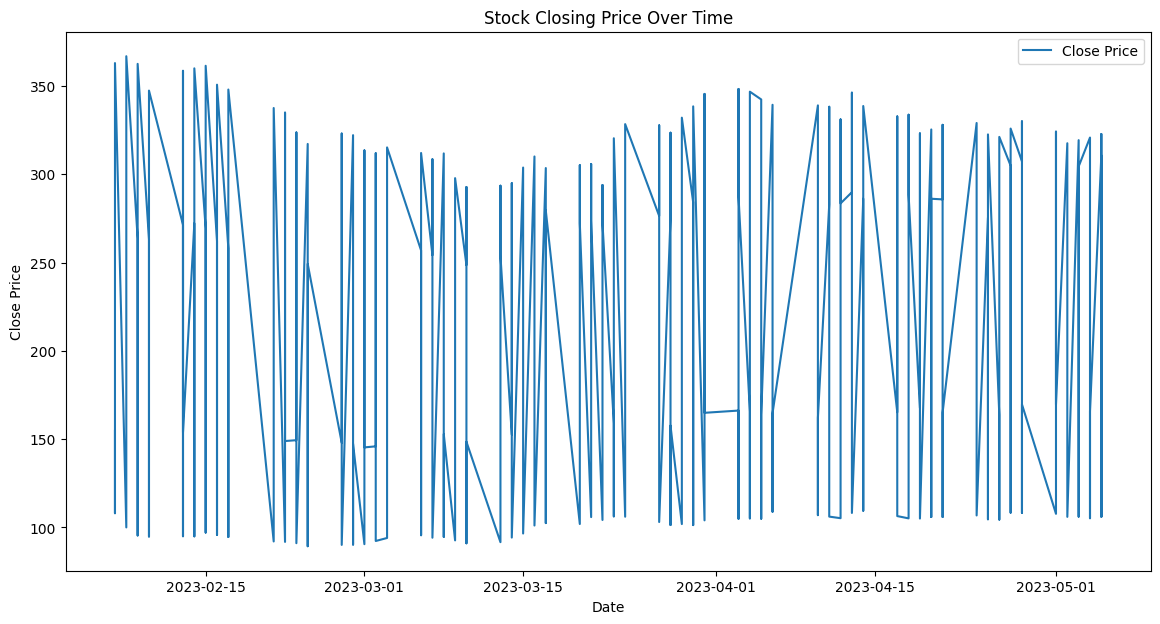

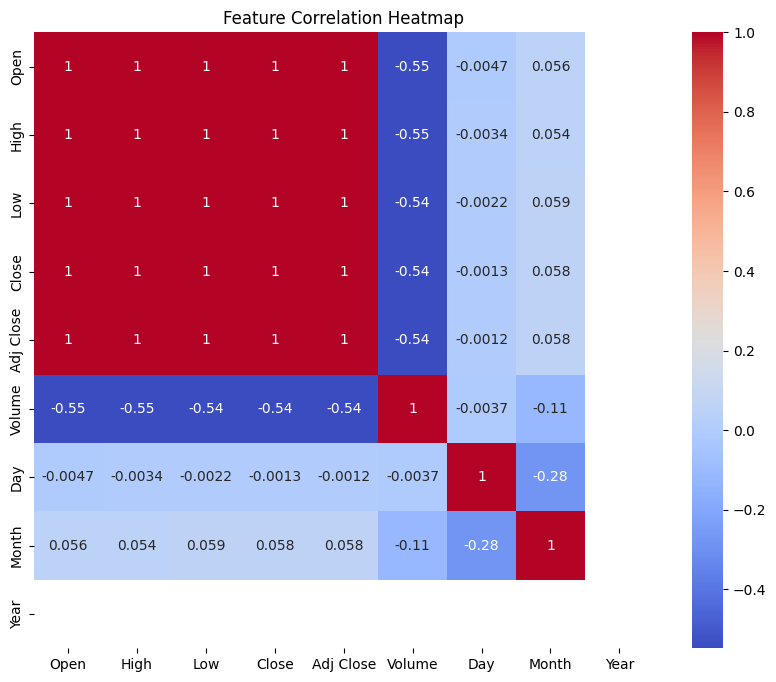

c:\Users\Rushil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


            Model     RMSE  R2 Score
    Decision Tree 7.069375  0.993977
          XGBoost 3.696082  0.998353
Linear Regression 1.709119  0.999648


c:\Users\Rushil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Rushil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
""""
OUTPUT:
            Model     RMSE    R2 Score
    Decision Tree  6.647545   0.994674
          XGBoost  3.696082   0.998353
Linear Regression  1.709119   0.999648

Approach:
1. Loads stock market data from a CSV file.
2. Preprocesses the data by converting the 'Date' column to datetime format and extracting day, month, and year.
3. Performs exploratory data analysis (EDA) to visualize the closing price over time and the correlation between features.
4. Splits the data into training and testing sets.
5. Defines a function to run different regression models (Decision Tree, XGBoost, Linear Regression) and evaluate their performance using RMSE and R2 score.
6. Trains and evaluates the models on the training and testing sets.
7. Displays the results in a DataFrame with model names, RMSE, and R2 scores.
8. Prints the results DataFrame without the index.    
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Load and preprocess data
def load_data(filepath):
    df = pd.read_csv(filepath)
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df

# EDA function
def perform_eda(df):
    print(df.head())
    print(df.describe())
    print(df.info())
    print(df.isnull().sum())
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Closing Price Over Time')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 8))
    numeric_df = df.select_dtypes(include=[np.number])
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()

# Train/test split
def split_data(df):
    features = ['Open', 'High', 'Low', 'Volume', 'Day', 'Month', 'Year']
    target = 'Close'
    X = df[features]
    y = df[target]
    return train_test_split(X, y, test_size=0.2, shuffle=False)

# Model runners
def run_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    return [name, rmse, r2]

# Main execution
if __name__ == "__main__":
    filepath = rf'C:\Users\Rushil\Desktop\training\Supervised\datasets\stocks.csv'  
    df = load_data(filepath)
    perform_eda(df)
    X_train, X_test, y_train, y_test = split_data(df)

    results = []
    results.append(run_model("Decision Tree", DecisionTreeRegressor(), X_train, X_test, y_train, y_test))
    results.append(run_model("XGBoost", XGBRegressor(), X_train, X_test, y_train, y_test))
    results.append(run_model("Linear Regression", LinearRegression(), X_train, X_test, y_train, y_test))

    results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2 Score'])
    print(results_df.to_string(index=False))  



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  



C:\Users\Rushil\AppData\Local\Temp\ipykernel_19168\457344021.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Rushil\AppData\Local\Temp\ipykernel_19168\457344021.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


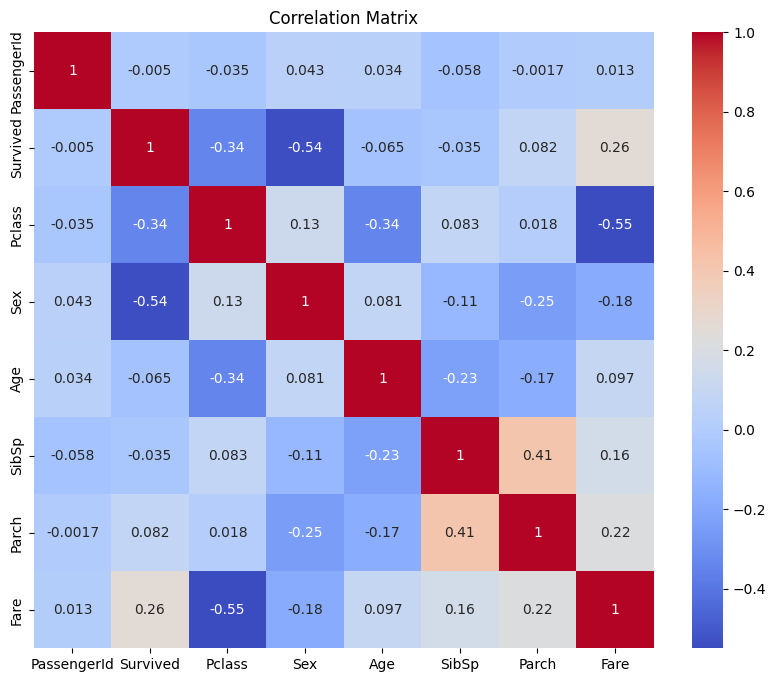

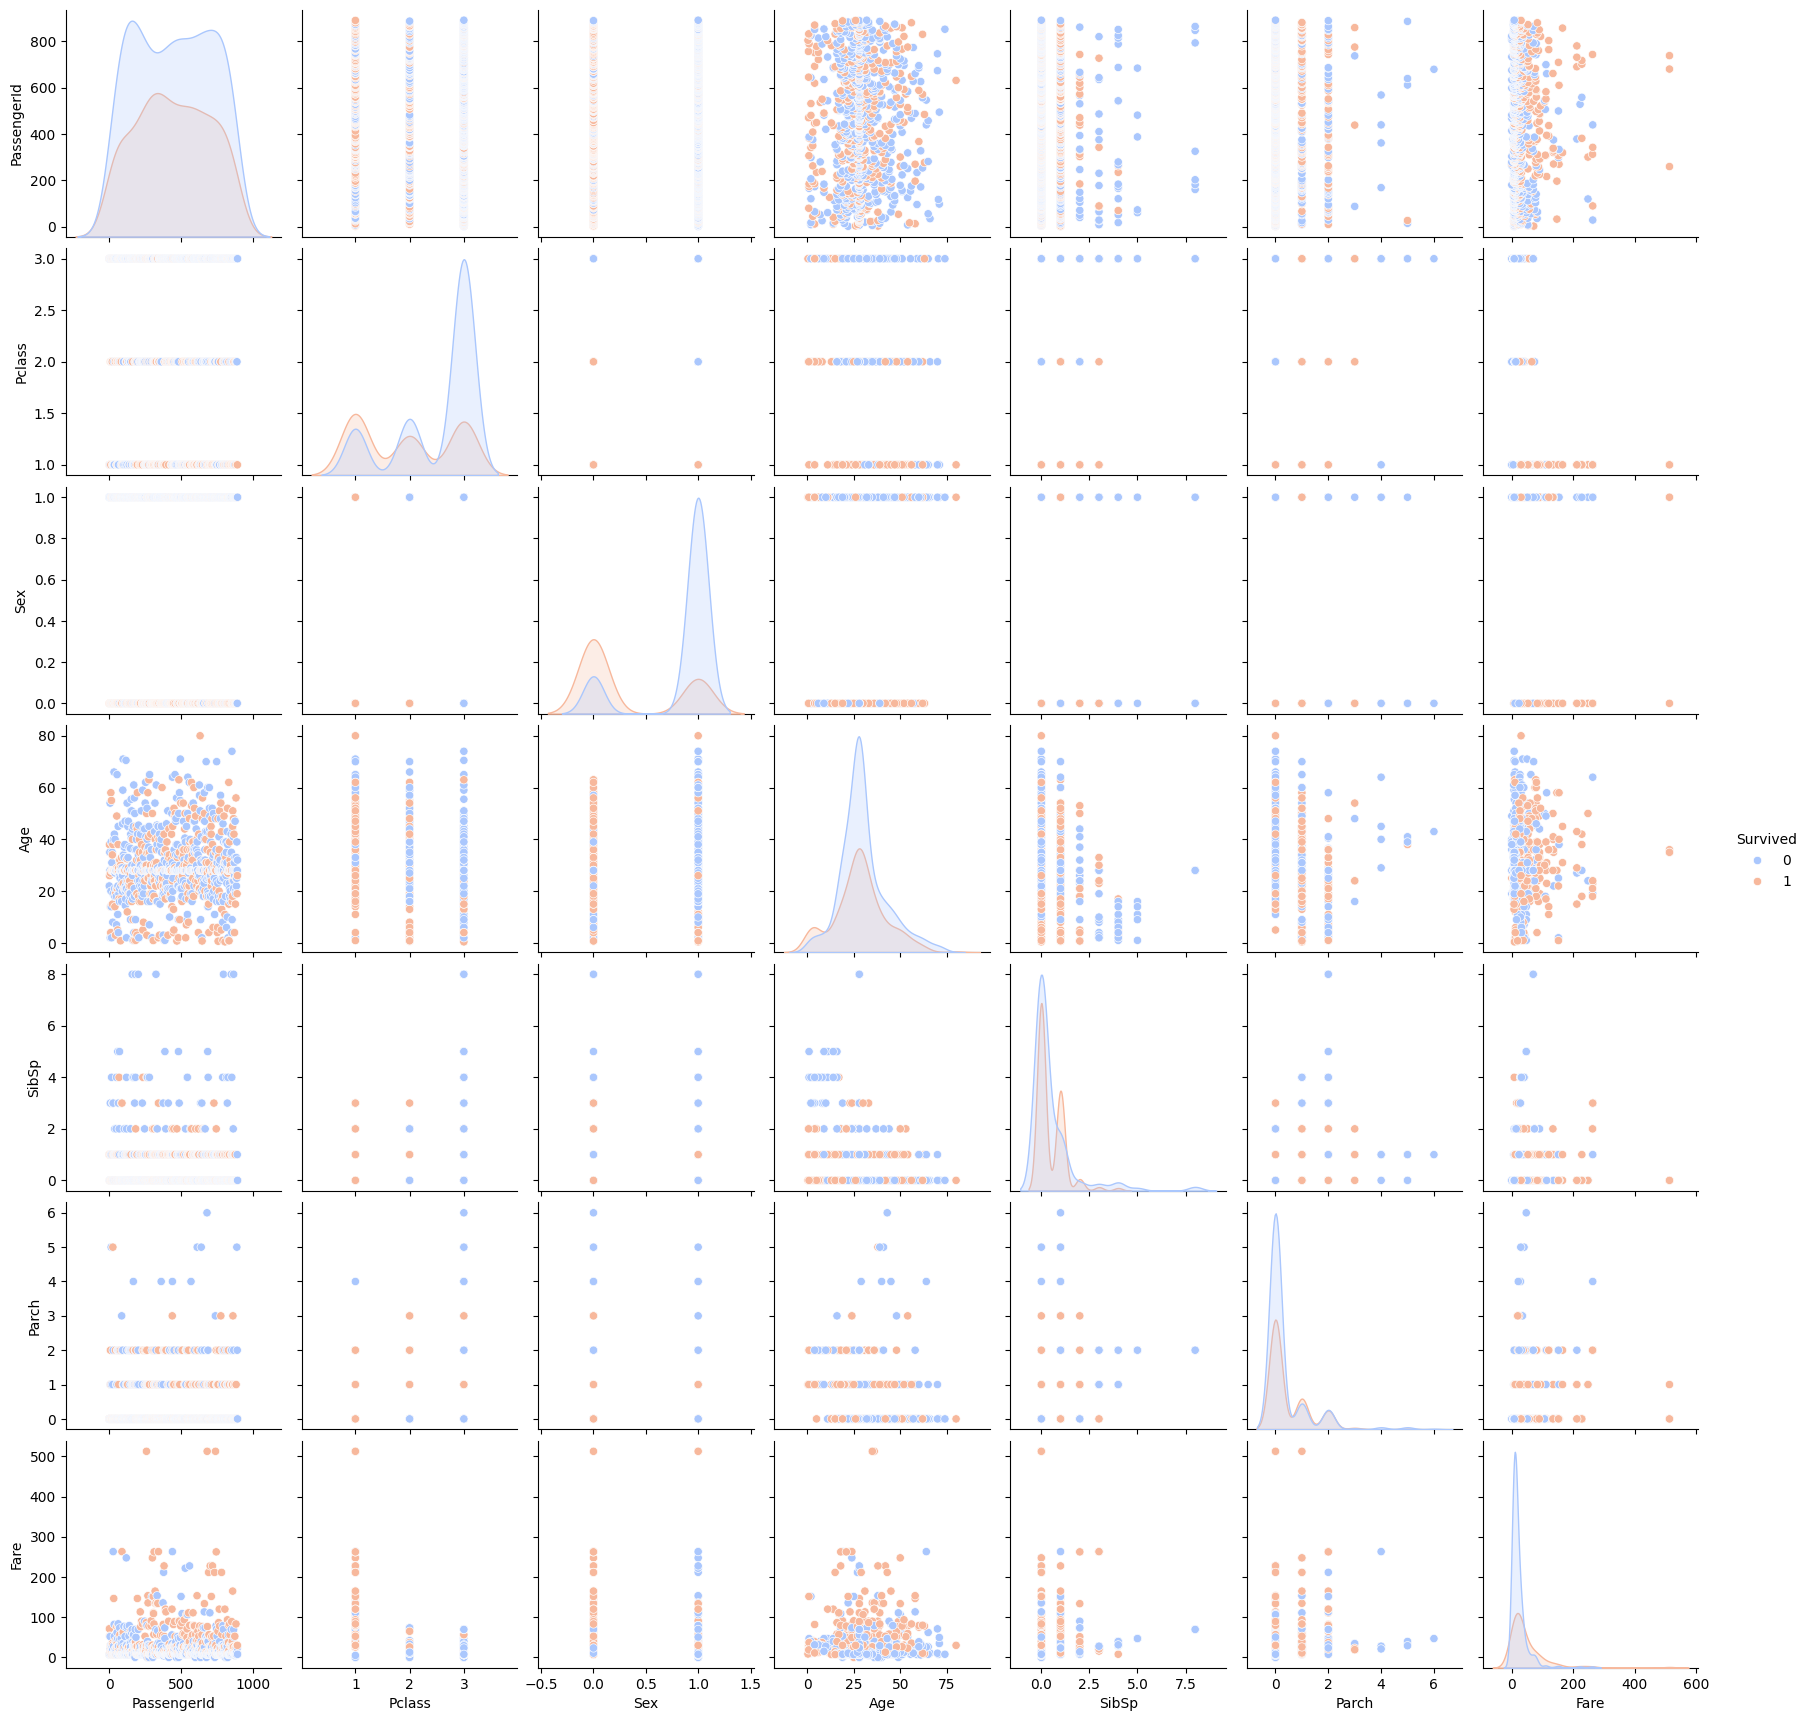

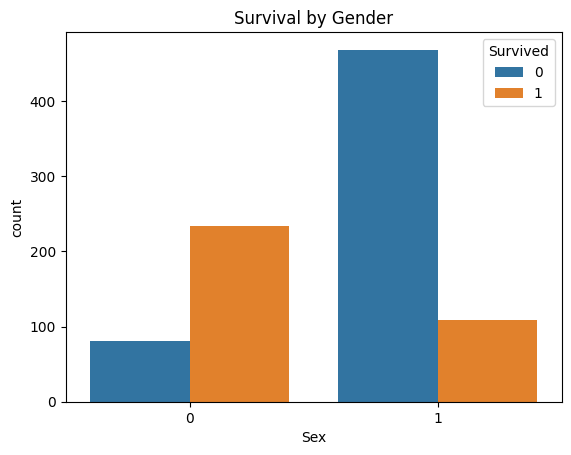

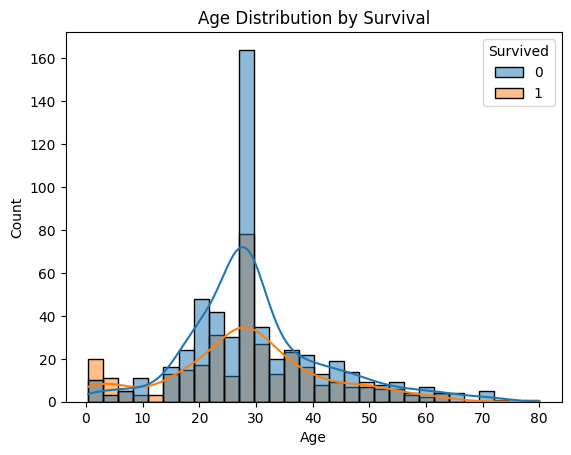

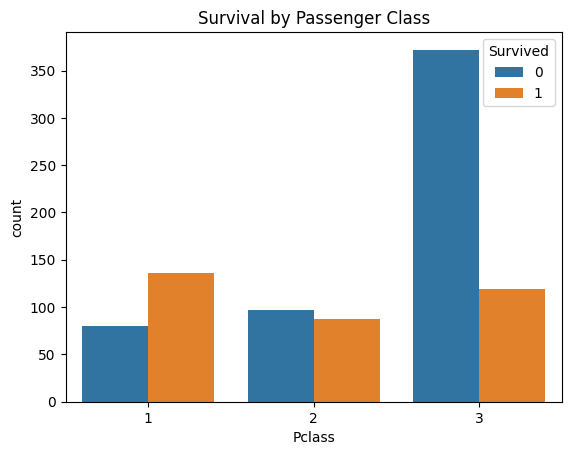


Model: RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)
Training Accuracy: 0.8539
Testing Accuracy : 0.8436

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       110
           1       0.85      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



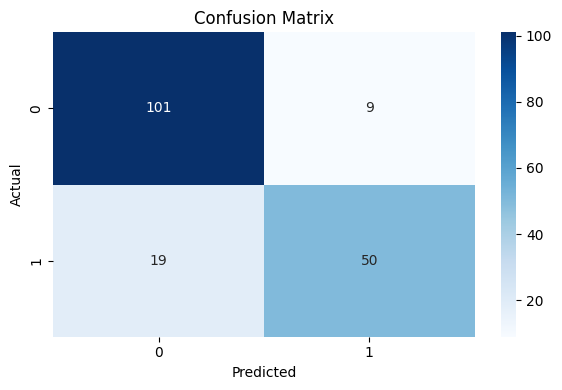


Submission file created: result_new.csv


In [4]:
"""
Training Accuracy: 0.8539
Testing Accuracy : 0.8436

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       110
           1       0.85      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179
"""

"""Steps 
1. Load the data
2. Preprocess the data (handle missing values, encode categorical variables, etc.)  
3. Visualize the data (correlation matrix, pairplot, etc.)
4. Split the data into training and testing sets
5. Train a Random Forest model
6. Evaluate the model (accuracy, classification report, confusion matrix)
7. Make predictions on the test set
8. Save the predictions to a CSV file"""

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv(r"C:\Users\Rushil\Desktop\training\Titanic\train.csv")
data_test = pd.read_csv(r"C:\Users\Rushil\Desktop\training\Titanic\test.csv")

# Display basic structure and info
print("\n" + "="*60)

print(data.head())

print("\n" + "="*60)

print(data_test.head())

print("\n" + "="*60)

print(data.tail())

print("\n" + "="*60)

print(data_test.tail())

print("\n" + "="*60)

print(data.describe())

print("\n" + "="*60)

print(data.isnull().sum())

print("\n" + "="*60)

print(data_test.isnull().sum())

# Handle missing values by filling with median for numerical features
data['Age'].fillna(data['Age'].median(), inplace=True)
data_test['Age'].fillna(data_test['Age'].median(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].median(), inplace=True)

# Drop unnecessary columns
data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
data_test.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

for col in data_test.select_dtypes(include='object').columns:
    if col in label_encoders:
        data_test[col] = label_encoders[col].transform(data_test[col])
    else:
        data_test[col] = LabelEncoder().fit_transform(data_test[col])

# Generates the Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(data, hue='Survived', diag_kind='kde', palette='coolwarm')
plt.show()

# Countplot for Gender
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()

# Age Distribution
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

# Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

# Features and Target
Y = data['Survived']
X = data.drop(columns=['Survived', 'PassengerId'])

# Prepare test data
test_passenger_ids = data_test['PassengerId']
X_test_data = data_test.drop(columns=['PassengerId'])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_test = scaler.transform(X_test_data)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=1)

# Random Forest with Overfitting Control
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Model Training
model.fit(X_train, Y_train)

# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluation Matrix
print("\n" + "="*60)
print(f"Model: {model}")
print(f"Training Accuracy: {accuracy_score(Y_train, train_preds):.4f}")
print(f"Testing Accuracy : {accuracy_score(Y_test, test_preds):.4f}")

print("\nClassification Report (Test Data):")
print(classification_report(Y_test, test_preds))

#Generates Confusion Matrix
cm = confusion_matrix(Y_test, test_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Final Prediction on test set
final_predictions = model.predict(X_scaled_test)

# Saves output in CSV forma
output = pd.DataFrame({'PassengerId': test_passenger_ids, 'Survived': final_predictions})
output.to_csv('result_new.csv', index=False)
print("\nSubmission file created: result_new.csv")



  Order ID  Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    66.0   -12.0   
2  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad     8.0    -2.0   
3  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    80.0   -56.0   
4  B-25602  01-04-2018        Pearl  Maharashtra       Pune   168.0  -111.0   

   Quantity     Category      Sub-Category  
0         7    Furniture         Bookcases  
1         5     Clothing             Stole  
2         3     Clothing       Hankerchief  
3         4  Electronics  Electronic Games  
4         2  Electronics            Phones  

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

            Amount       Profit     Quantity
count  1500.00

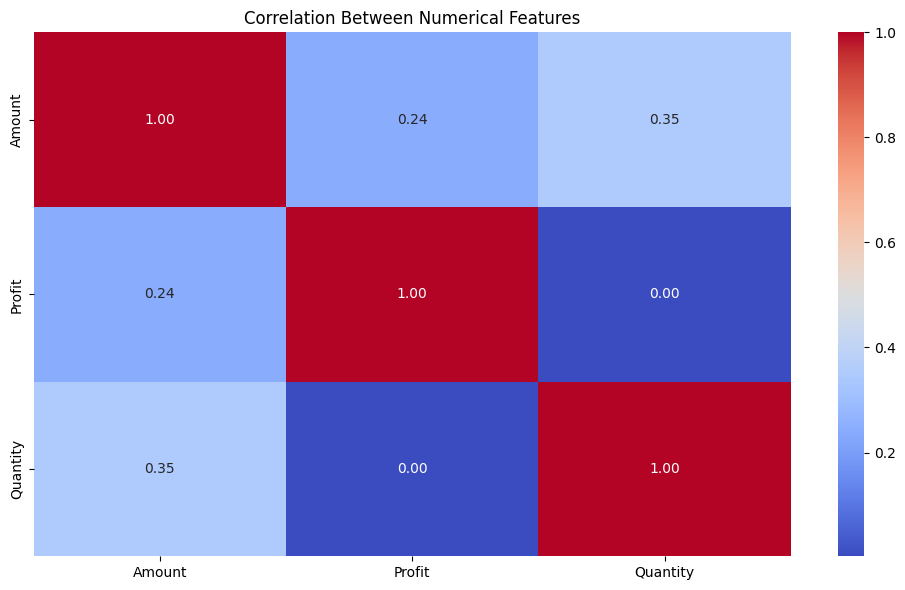

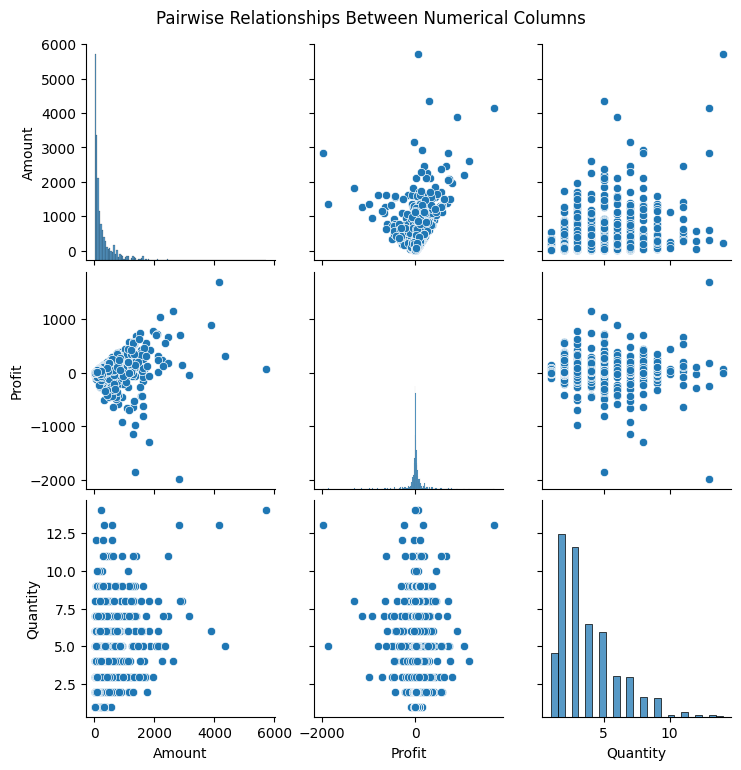


DBSCAN Silhouette Score: 0.8935


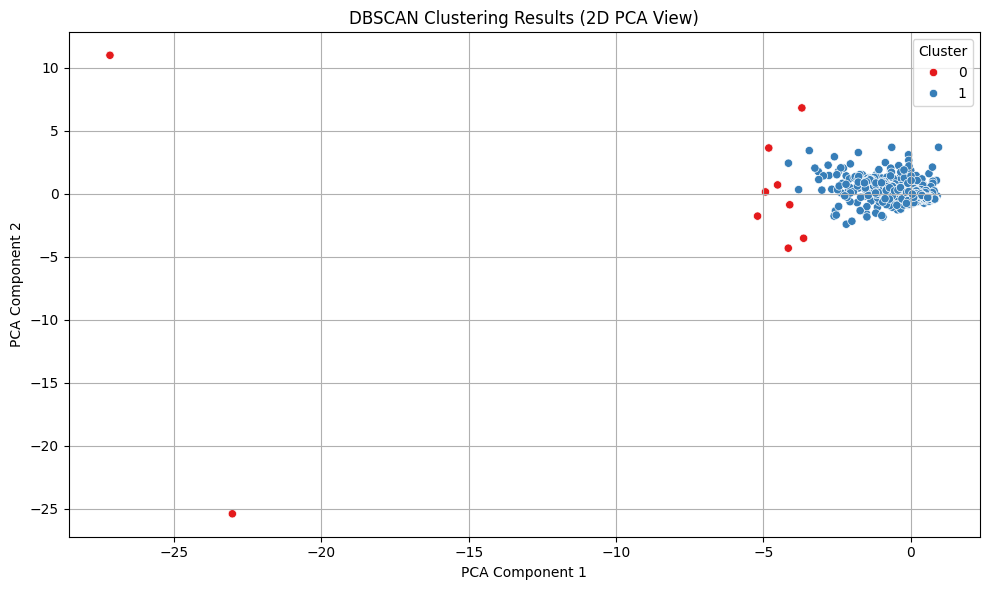


 DBSCAN Cluster Distribution 
DBSCAN_Cluster
1    1490
0      10
Name: count, dtype: int64

KMeans Silhouette Score: 0.6023


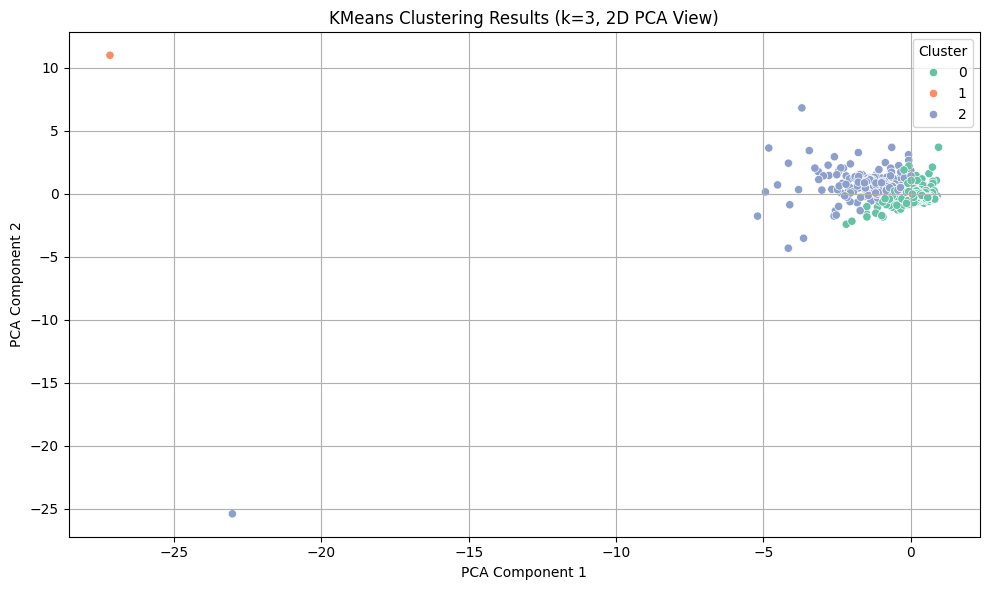


 KMeans Cluster Distribution 
KMeans_Cluster
0    1219
2     280
1       1
Name: count, dtype: int64

KMedoids Silhouette Score: 0.3597


c:\Users\Rushil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


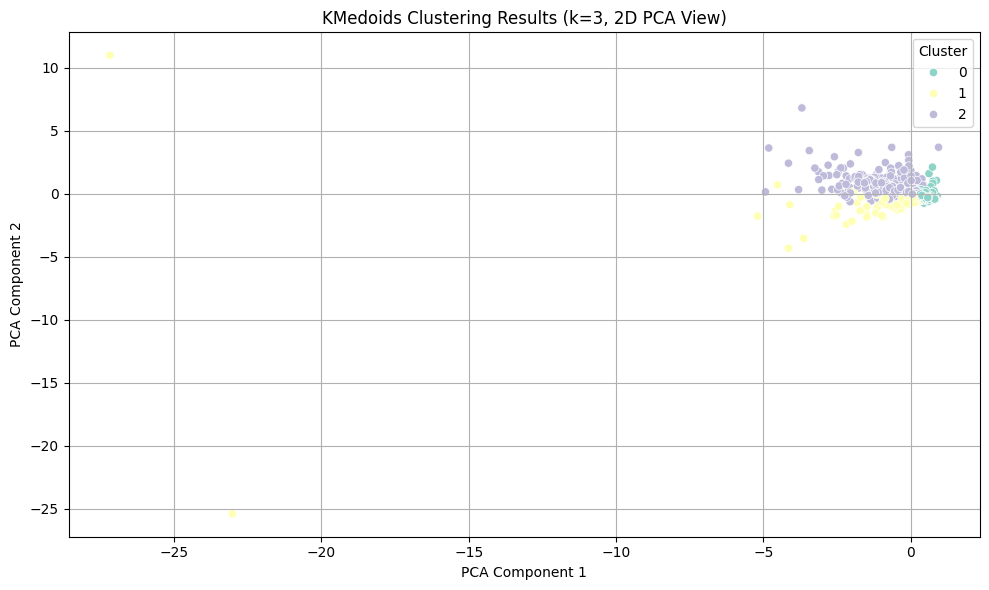


 KMedoids Cluster Distribution
KMedoids_Cluster
0    722
2    576
1    202
Name: count, dtype: int64


In [5]:
'''DBSCAN Silhouette Score: 0.8935
   KMeans Silhouette Score: 0.6023
   KMedoids Silhouette Score: 0.3597
'''
"""
Aproach:
1. Load the datasets and merge them.
2. Perform exploratory data analysis (EDA) to understand the data.
3. Visualize the correlation between numerical features using a heatmap.
4. Generate a pairplot to visualize relationships between numerical features.
5. Select features for clustering and handle skewness in the data.
6. Standardize the features using StandardScaler.
7. Apply PCA to reduce dimensionality for visualization.
8. Implement DBSCAN clustering and evaluate the results using silhouette score.
9. Visualize the DBSCAN clustering results in a 2D PCA view.
10. Visualize the K-Medoids clustering results in a 2D PCA view.
11. Implement KMeans clustering and evaluate the results using silhouette score."""


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids  

# Load datasets
df_orders = pd.read_csv(rf'C:\Users\Rushil\Desktop\training\Unsupervised\datasets\List of Orders.csv')
df_order_details = pd.read_csv(rf'C:\Users\Rushil\Desktop\training\Unsupervised\datasets\Order Details.csv')

# Merge datasets
df = pd.merge(df_orders, df_order_details, on='Order ID')

# EDA
print("\n" + "="*60)
print(df.head())
print("\n" + "="*60)
print(df.isnull().sum())
print("\n" + "="*60)
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()

# Generates Pairplot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if len(numeric_cols) > 1:
    sns.pairplot(df[numeric_cols])
    plt.suptitle('Pairwise Relationships Between Numerical Columns', y=1.02)
    plt.show()

# Features for clustering
features = ['Quantity', 'Profit', 'Amount']
df_cluster = df[features].dropna().copy()

# Handle left skewness: reflect + log transform
for col in ['Profit', 'Quantity', 'Amount']:
    max_val = df_cluster[col].max()
    df_cluster[col] = np.log1p(max_val + 1 - df_cluster[col])

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

def apply_dbscan(X_scaled, X_pca):
    dbscan = DBSCAN(eps=1.5, min_samples=10)
    dbscan_labels = dbscan.fit_predict(X_scaled)

    unique_clusters = np.unique(dbscan_labels)
    cluster_map = {old_label: idx for idx, old_label in enumerate(unique_clusters)}
    adjusted_clusters = np.array([cluster_map[label] for label in dbscan_labels])

    df['DBSCAN_Cluster'] = -1
    df.loc[df_cluster.index, 'DBSCAN_Cluster'] = adjusted_clusters

    if len(set(adjusted_clusters)) > 1:
        score = silhouette_score(X_scaled, adjusted_clusters)
        print(f"\nDBSCAN Silhouette Score: {score:.4f}")
    else:
        print("\nDBSCAN Silhouette Score: Not applicable (only one cluster or noise)")

    plt.figure(figsize=(10, 6))
    palette = sns.color_palette("Set1", len(np.unique(adjusted_clusters)))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=adjusted_clusters, palette=palette)
    plt.title('DBSCAN Clustering Results (2D PCA View)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n DBSCAN Cluster Distribution ")
    print(df['DBSCAN_Cluster'].value_counts())

def apply_kmeans(X_scaled, X_pca, n_clusters=3, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    df['KMeans_Cluster'] = -1
    df.loc[df_cluster.index, 'KMeans_Cluster'] = kmeans_labels

    score = silhouette_score(X_scaled, kmeans_labels)
    print(f"\nKMeans Silhouette Score: {score:.4f}")

    plt.figure(figsize=(10, 6))
    palette = sns.color_palette("Set2", n_clusters)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette=palette)
    plt.title(f'KMeans Clustering Results (k={n_clusters}, 2D PCA View)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n KMeans Cluster Distribution ")
    print(df['KMeans_Cluster'].value_counts())

def apply_kmedoids(X_scaled, X_pca, n_clusters=3, random_state=42):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=random_state)
    kmedoids_labels = kmedoids.fit_predict(X_scaled)

    df['KMedoids_Cluster'] = -1
    df.loc[df_cluster.index, 'KMedoids_Cluster'] = kmedoids_labels

    score = silhouette_score(X_scaled, kmedoids_labels)
    print(f"\nKMedoids Silhouette Score: {score:.4f}")

    plt.figure(figsize=(10, 6))
    palette = sns.color_palette("Set3", n_clusters)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmedoids_labels, palette=palette)
    plt.title(f'KMedoids Clustering Results (k={n_clusters}, 2D PCA View)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n KMedoids Cluster Distribution")
    print(df['KMedoids_Cluster'].value_counts())

# Apply clustering algorithms
apply_dbscan(X_scaled, X_pca)
apply_kmeans(X_scaled, X_pca, n_clusters=3)
apply_kmedoids(X_scaled, X_pca, n_clusters=3)



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      

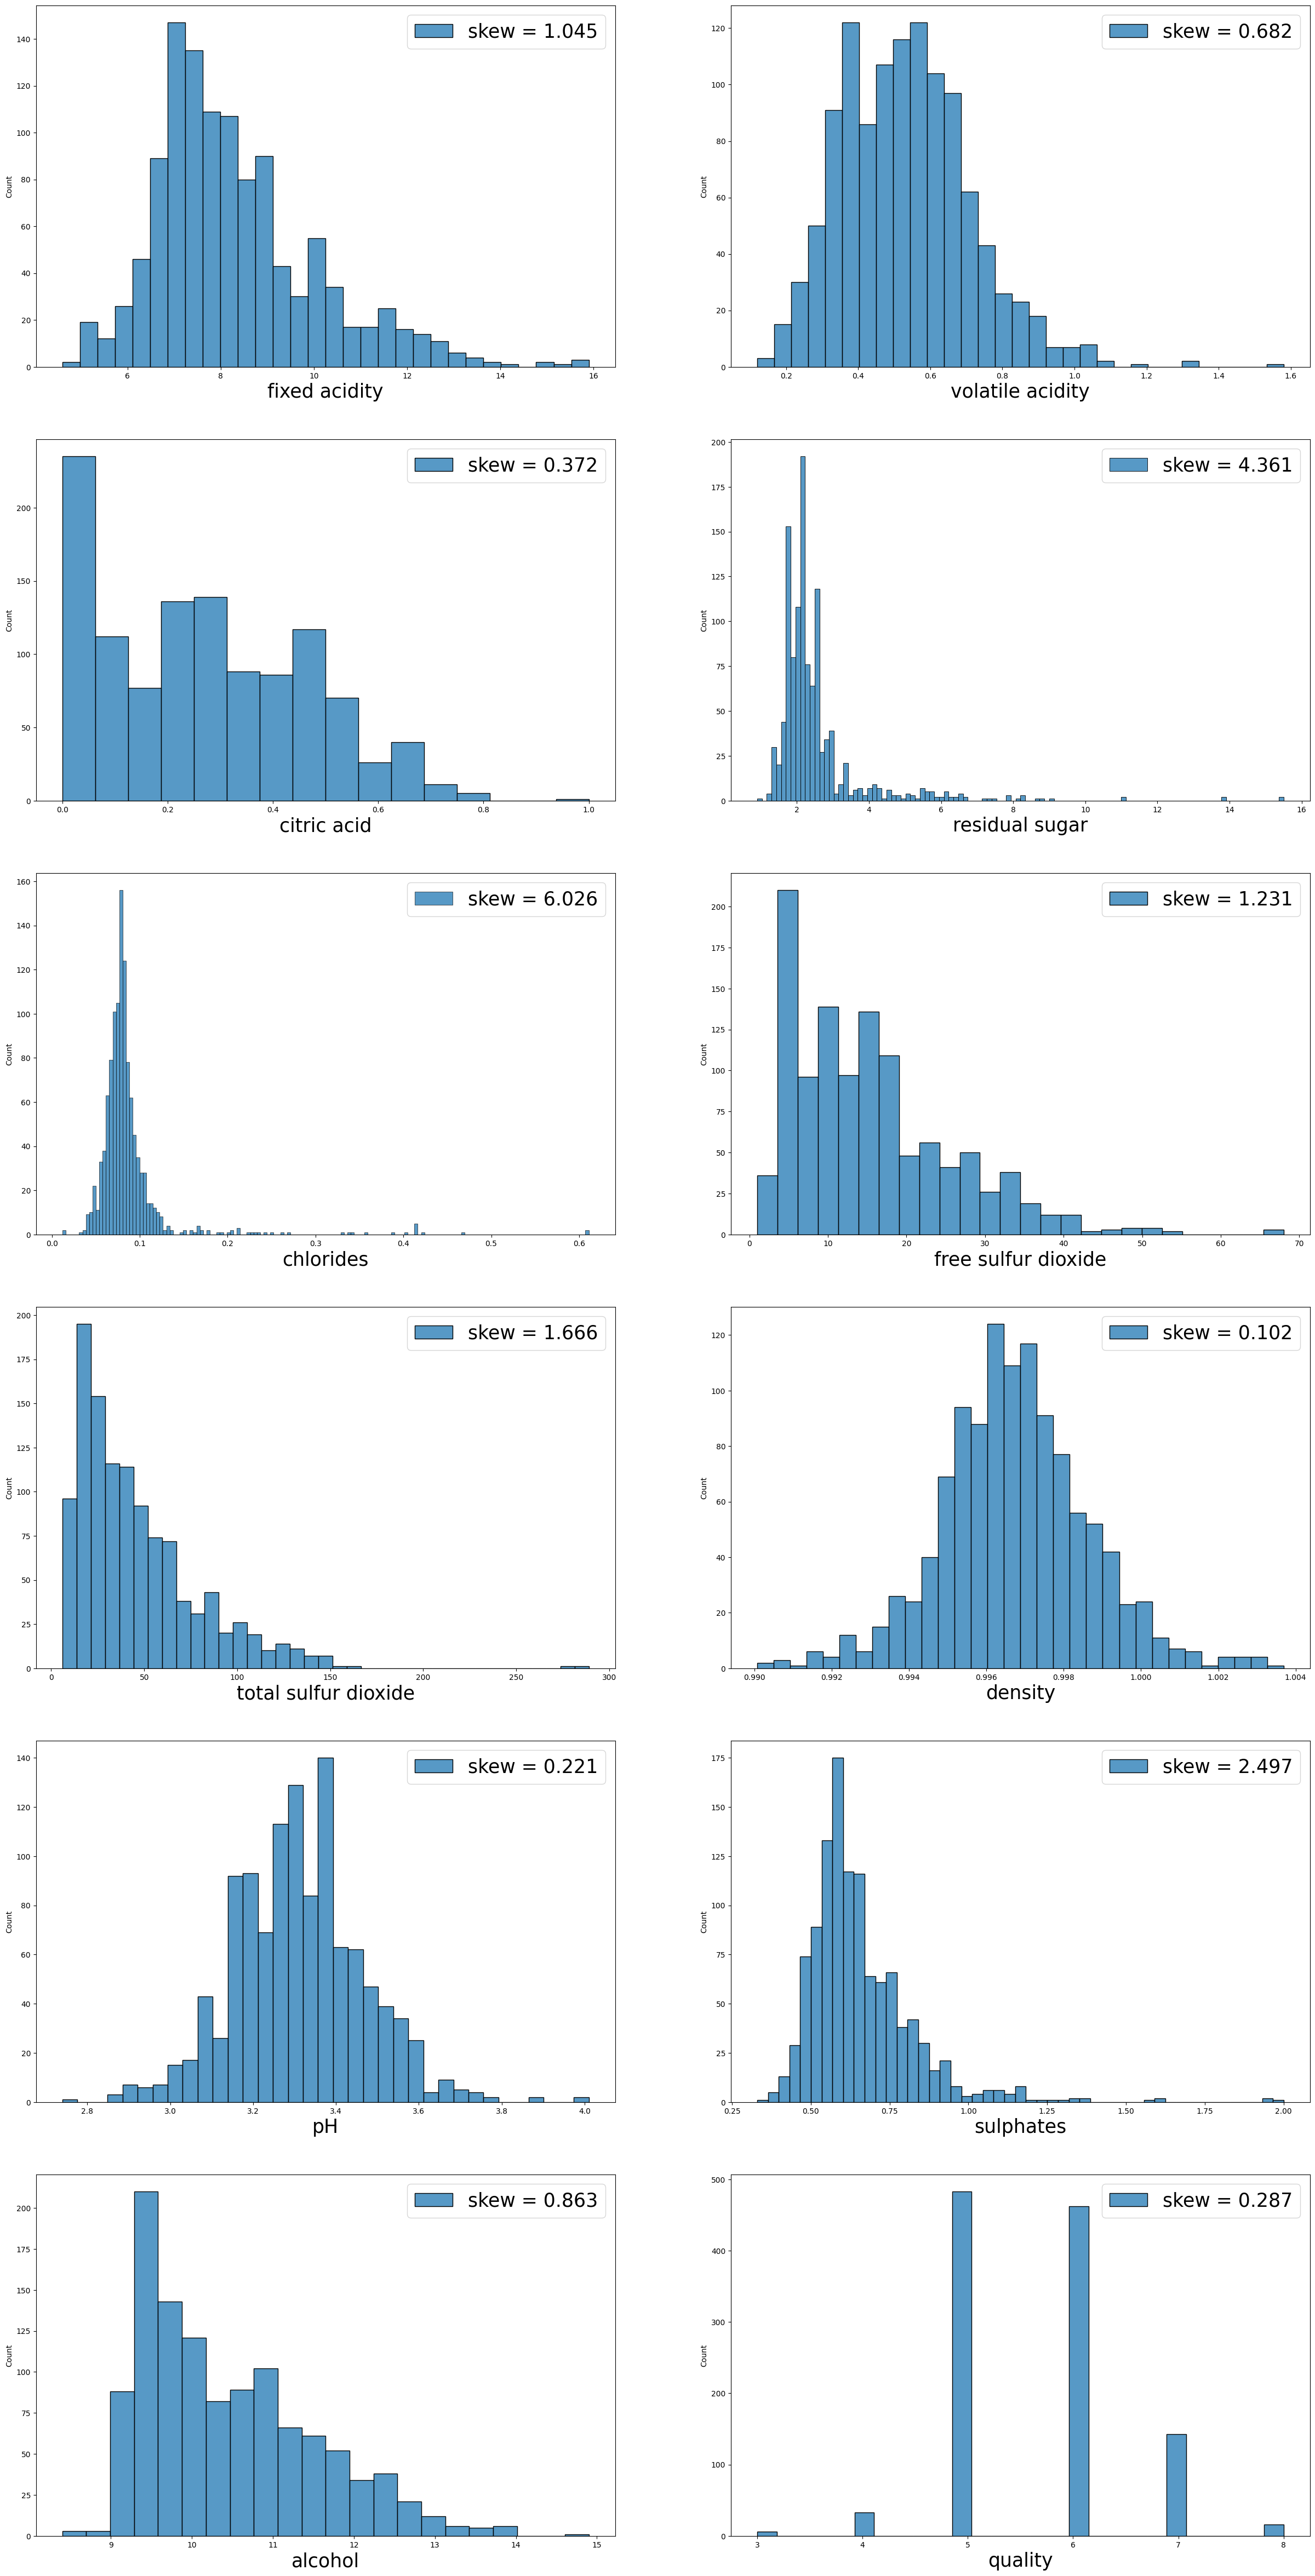

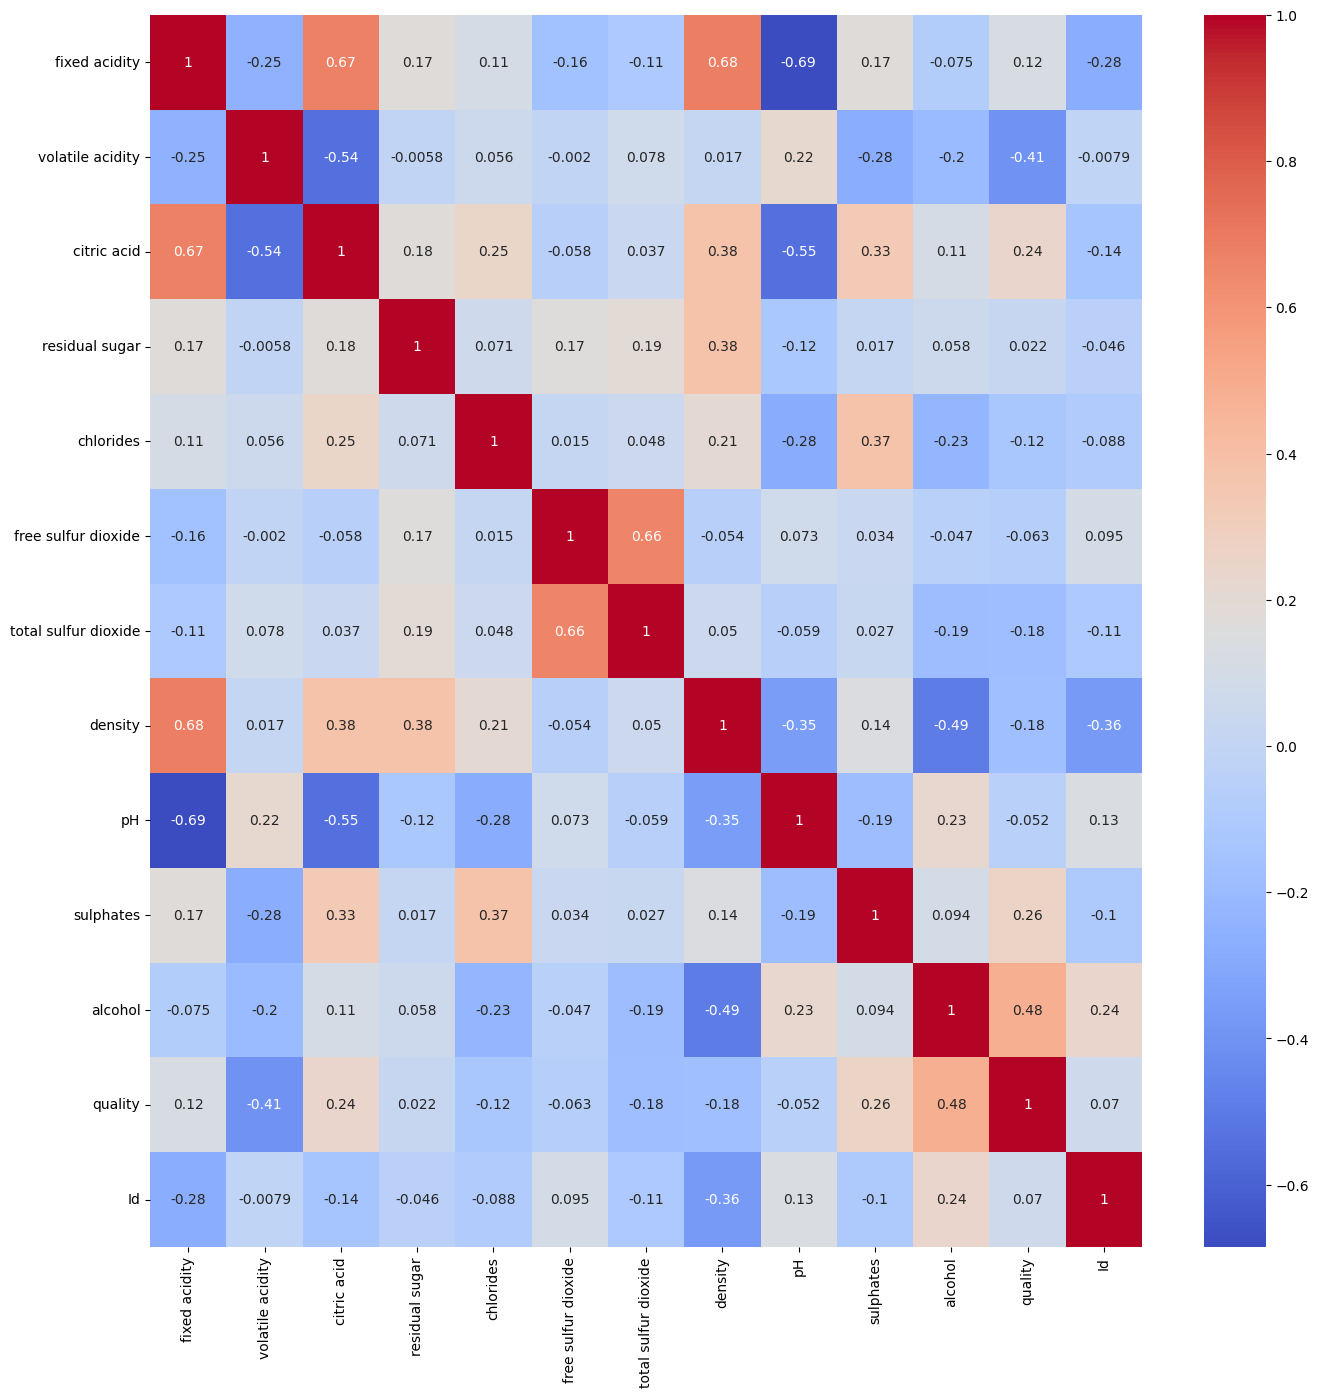

Best KNN Params: {'n_neighbors': 11}
KNN Model Results:
Accuracy: 0.6026200873362445
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.66      0.78      0.72        96
           6       0.58      0.57      0.57        99
           7       0.35      0.27      0.30        26
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.32      0.32      0.32       229
weighted avg       0.57      0.60      0.58       229



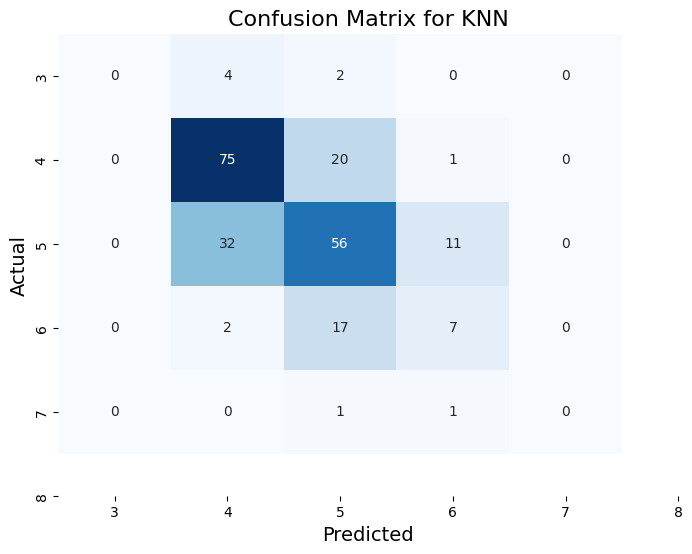

Best SVM Params: {'C': 1, 'kernel': 'rbf'}
SVM Model Results:
Accuracy: 0.6593886462882096
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.62      0.70      0.65        99
           7       0.71      0.38      0.50        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.41      0.37      0.38       229
weighted avg       0.64      0.66      0.64       229



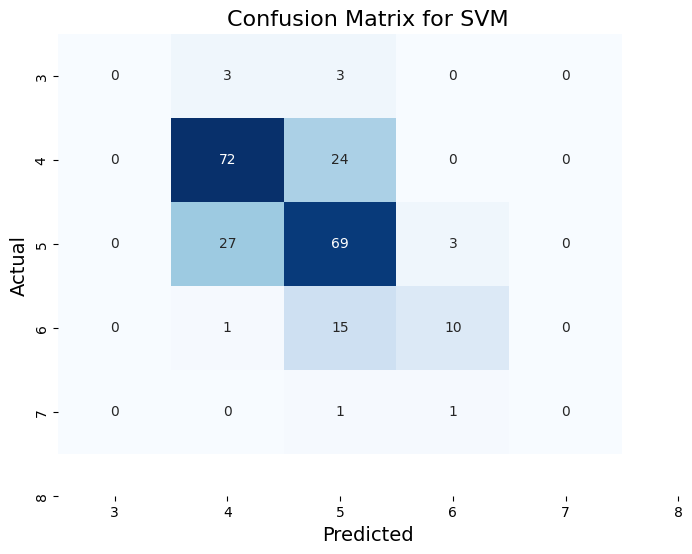

Best Logistic Regression Params: {'C': 0.1}
Logistic Regression Model Results:
Accuracy: 0.6375545851528385
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.63      0.64      0.63        99
           7       0.52      0.50      0.51        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.37      0.37       229
weighted avg       0.62      0.64      0.63       229



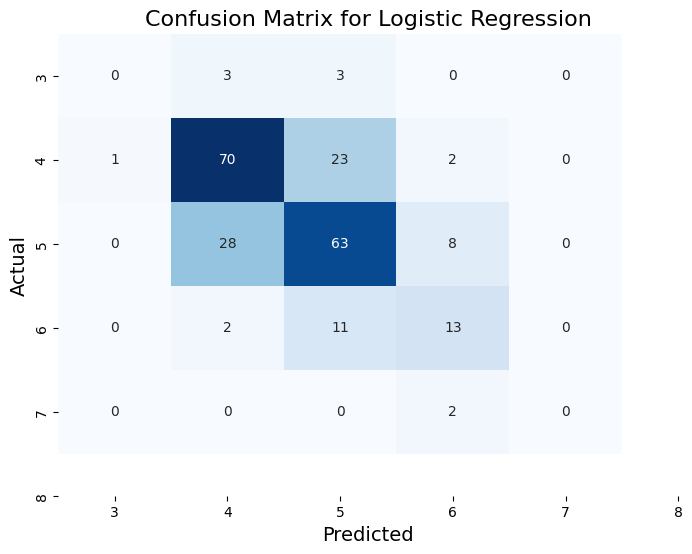

In [2]:
"""
Output:
Best KNN Params: {'n_neighbors': 11}
KNN Model Results:
Accuracy: 0.6026200873362445
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.66      0.78      0.72        96
           6       0.58      0.57      0.57        99
           7       0.35      0.27      0.30        26
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.32      0.32      0.32       229
weighted avg       0.57      0.60      0.58       229

Best SVM Params: {'C': 1, 'kernel': 'rbf'}
SVM Model Results:
Accuracy: 0.6593886462882096
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.62      0.70      0.65        99
           7       0.71      0.38      0.50        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.41      0.37      0.38       229
weighted avg       0.64      0.66      0.64       229

Best Logistic Regression Params: {'C': 0.1}
Logistic Regression Model Results:
Accuracy: 0.6375545851528385
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.63      0.64      0.63        99
           7       0.52      0.50      0.51        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.37      0.37       229
weighted avg       0.62      0.64      0.63       229

Approach:
1. Load the dataset from a CSV file.
2. Inspect the data by displaying the first and last few rows, summary statistics, and checking for missing values.
3. Visualize the distribution of each feature using histograms and a correlation heatmap.
4. Preprocess the data by separating features and target variable, standardizing the features, and splitting the data into training and testing sets.
5. Define functions to train and evaluate KNN, SVM, and Logistic Regression classifiers.
6. Implement hyperparameter tuning using GridSearchCV for KNN, SVM, and Logistic Regression.
7. Train and evaluate the models with the best hyperparameters.
"""

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the dataset
file_path = r"C:\Users\Rushil\Desktop\training\Supervised\datasets\WineQT.csv"
data = pd.read_csv(file_path)

# Inspect the data
print("\n" + "="*60)
print(data.head())
print("\n" + "="*60)
print(data.tail())
print("\n" + "="*60)
print(data.describe())
print("\n" + "="*60)
print(data.isnull().sum())



#  Plot histograms for skewness
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(30, 60))
for p, ax in zip(data.columns, axs.flat):
    skew = data[p].skew()
    sns.histplot(data[p], kde=False, label=f'skew = {skew:.3f}', ax=ax)
    ax.legend(loc='best', fontsize=25)
    ax.set_xlabel(p, fontsize=25)
plt.show()

#Correlation Heatmap
corr = data.corr()
fig = plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing
def preprocess_data(data):
    X = data.drop(columns=['quality'])  
    y = data['quality']
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data)

# Improved confusion matrix visualization
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.show()

# Model Training and Evaluation
def train_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print("KNN Model Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, "KNN")

def train_svm(X_train, X_test, y_train, y_test, kernel='linear'):
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    print("SVM Model Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, "SVM")

def train_logistic_regression(X_train, X_test, y_train, y_test):
    log_reg = LogisticRegression(max_iter=200)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    print("Logistic Regression Model Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, "Logistic Regression")

# Hyperparameter Tuning to improve model accuracy

# GridSearch for KNN
def tune_knn(X_train, y_train):
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best KNN Params: {grid_search.best_params_}")
    return grid_search.best_estimator_

# GridSearch for SVM
def tune_svm(X_train, y_train):
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best SVM Params: {grid_search.best_params_}")
    return grid_search.best_estimator_

# GridSearch for Logistic Regression
def tune_logistic_regression(X_train, y_train):
    param_grid = {'C': [0.1, 1, 10]}
    grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best Logistic Regression Params: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Tune and evaluate models
best_knn = tune_knn(X_train, y_train)
train_knn(X_train, X_test, y_train, y_test, n_neighbors=best_knn.get_params()['n_neighbors'])

best_svm = tune_svm(X_train, y_train)
train_svm(X_train, X_test, y_train, y_test, kernel=best_svm.get_params()['kernel'])

best_log_reg = tune_logistic_regression(X_train, y_train)
train_logistic_regression(X_train, X_test, y_train, y_test)
